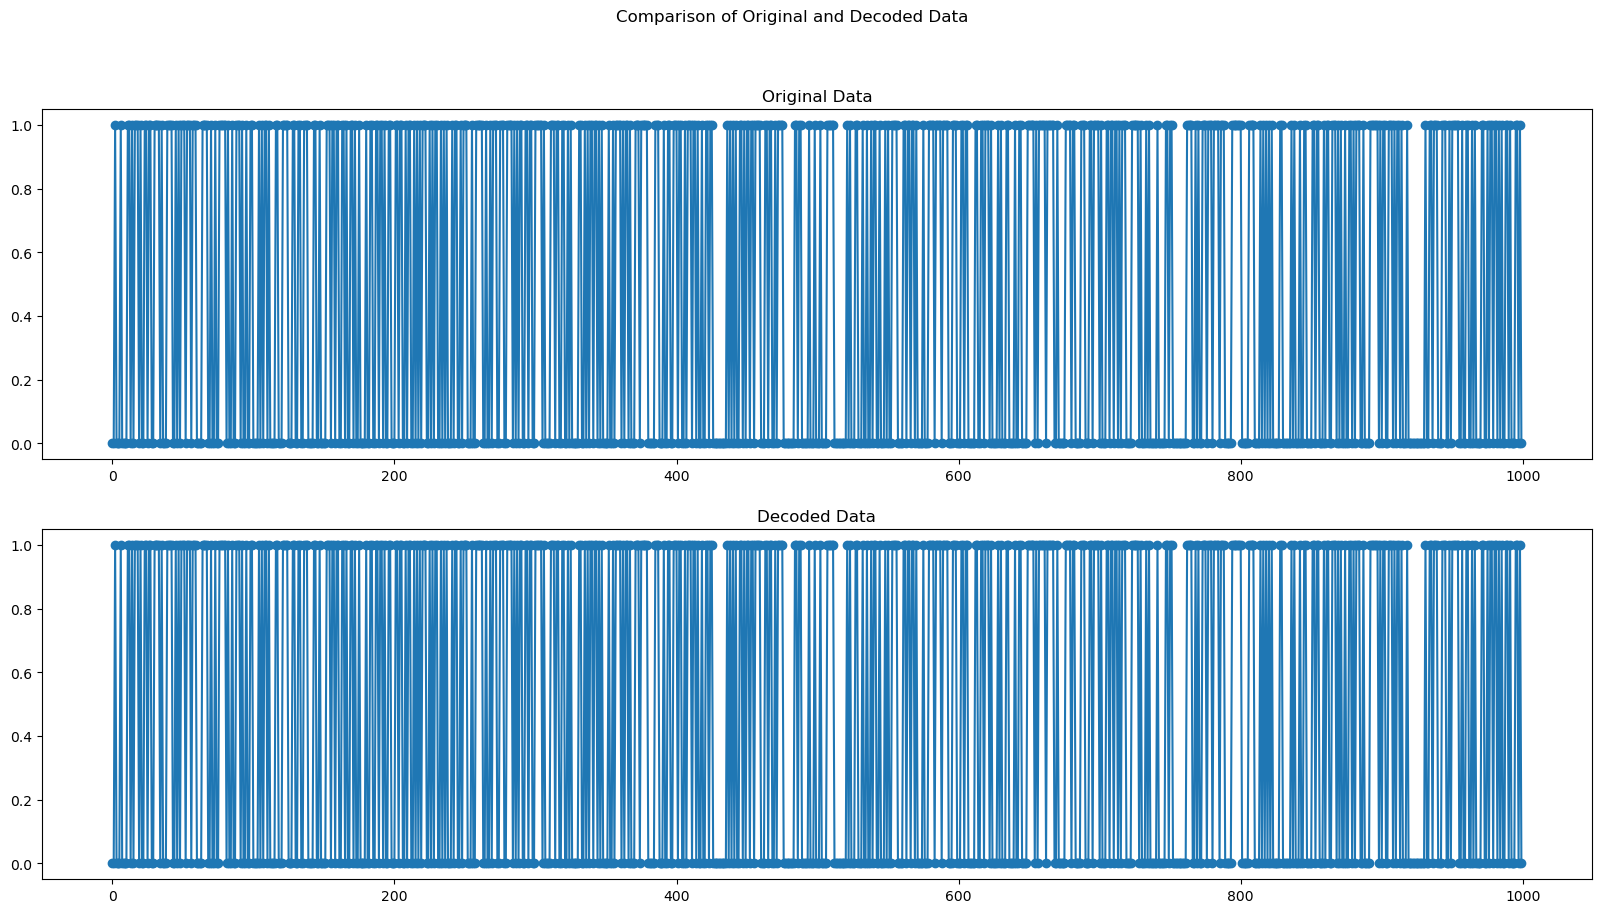

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Generate random binary data
data = np.random.randint(2, size=1000)

# Encode binary data into PAM4 signal
pam4_signal = []
for i in range(0, len(data), 2):
    if data[i] == 0 and data[i+1] == 0:
        pam4_signal.append(-3)
    elif data[i] == 0 and data[i+1] == 1:
        pam4_signal.append(-1)
    elif data[i] == 1 and data[i+1] == 0:
        pam4_signal.append(1)
    elif data[i] == 1 and data[i+1] == 1:
        pam4_signal.append(3)

# Add noise to the signal
noise_power = 0.1
pam4_signal_noisy = pam4_signal + np.random.normal(0, noise_power, len(pam4_signal))

# Decode PAM4 signal back to binary data
decoded_data = []
for i in range(len(pam4_signal_noisy)):
    if pam4_signal[i] < -2:
        decoded_data += [0, 0]
    elif pam4_signal[i] < 0:
        decoded_data += [0, 1]
    elif pam4_signal[i] < 2:
        decoded_data += [1, 0]
    else:
        decoded_data += [1, 1]

# Plot original and decoded data
fig, axs = plt.subplots(2, 1, figsize=(20, 10))
fig.suptitle('Comparison of Original and Decoded Data')
axs[0].plot(data, 'o-')
axs[0].set_title('Original Data')
axs[1].plot(decoded_data, 'o-')
axs[1].set_title('Decoded Data')
plt.show()

In [5]:
pam4_signal_noisy

array([-2.86354686,  1.10242461, -3.01126524,  0.91734249, -3.09141334,
       -0.90454206,  0.72163956,  0.88416697,  3.00917501,  1.04721441,
        1.10451   , -0.95836212,  0.98497732,  2.87451487, -3.10267967,
        2.80988105,  3.16524608, -1.03556297, -2.9995411 , -0.89907523,
        2.82315211,  1.08460979, -1.1045026 , -1.04870573, -0.89436254,
        3.06910441, -1.03526293,  3.01303428, -1.01899074,  3.0813603 ,
       -2.83922402, -2.99540756,  2.97139445,  2.86944201, -3.02253829,
        0.97551358, -1.02155845, -3.04847674,  3.06905649,  3.01542327,
        1.08385722,  0.95806821, -0.84194675, -2.90312655,  3.11778311,
        1.13969187,  1.12229936, -1.05482048, -2.92393081,  3.08457195,
       -2.95495838, -3.04730346,  0.92369627,  0.98636778,  3.01807712,
       -0.94265687, -2.98498498, -2.92335002,  3.03499949, -3.07810653,
       -1.01693533,  2.93554267,  0.91110671, -2.94811817,  2.97031641,
       -2.83467459,  2.91218776, -3.13363507,  3.04630574,  0.98

In [9]:
decoded_data

[0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,


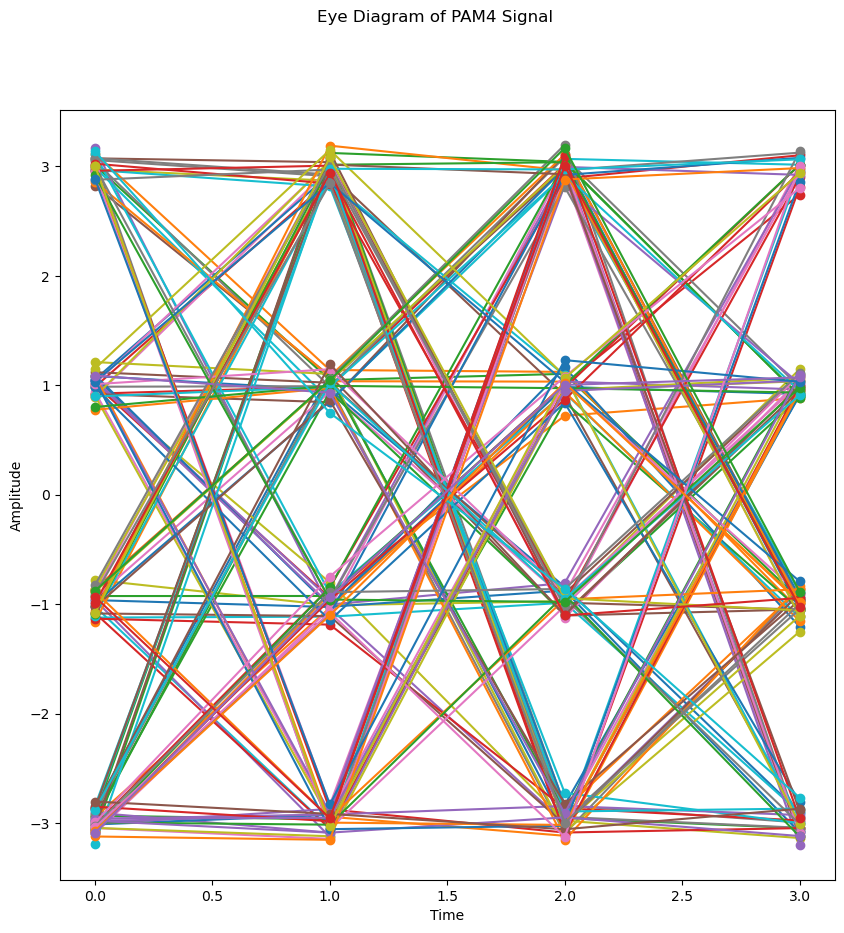

In [10]:
# Plot eye diagram of the signal
fig, ax = plt.subplots(figsize = (10, 10))
fig.suptitle('Eye Diagram of PAM4 Signal')
ax.set_xlabel('Time')
ax.set_ylabel('Amplitude')
for i in range(0, len(pam4_signal), 4):
    ax.plot(pam4_signal_noisy[i:i+4], 'o-')
plt.show()